In [10]:
import yfinance as yf
from datetime import datetime


stock = "THYAO.IS"

# time
start_date = datetime(2012, 2, 2)
end_date = datetime(2023,12,20)

# yfinance data pullling
bist30_data = yf.download(stock, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [15]:
from sklearn.metrics import mean_squared_error



In [38]:
df = bist30_data[["Close"]]
df.head()

,Close
Date,
2012-02-02,2.295652
2012-02-03,2.347826
2012-02-06,2.417391
2012-02-07,2.391304
2012-02-08,2.408695


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


# Veriyi önceden işleme
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Veriyi eğitim ve test setlerine bölme
train_size = int(len(df) * 0.80)
train, test = df_scaled[0:train_size], df_scaled[train_size:]

# Veriyi LSTM uygun formata dönüştürme
def create_dataset(dataset, n_steps):
    dataX, dataY = [], []
    for i in range(len(dataset)-n_steps):
        a = dataset[i:(i+n_steps), 0]
        dataX.append(a)
        dataY.append(dataset[i + n_steps, 0])
    return np.array(dataX), np.array(dataY)

n_steps = 50  # Örnek: 10 günlük veriye dayalı tahmin yapma
X_train, y_train = create_dataset(train, n_steps)
X_test, y_test = create_dataset(test, n_steps)

# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)



Epoch 1/200
75/75 [==============================] - 2s 17ms/step - loss: 6.2290e-05
Epoch 2/200
75/75 [==============================] - 1s 18ms/step - loss: 4.5147e-06
Epoch 3/200
75/75 [==============================] - 1s 18ms/step - loss: 4.2046e-06
Epoch 4/200
75/75 [==============================] - 1s 18ms/step - loss: 3.7618e-06
Epoch 5/200
75/75 [==============================] - 1s 18ms/step - loss: 3.9955e-06
Epoch 6/200
75/75 [==============================] - 1s 18ms/step - loss: 3.3689e-06
Epoch 7/200
75/75 [==============================] - 1s 18ms/step - loss: 3.2647e-06
Epoch 8/200
75/75 [==============================] - 1s 18ms/step - loss: 3.4998e-06
Epoch 9/200
75/75 [==============================] - 1s 18ms/step - loss: 3.0331e-06
Epoch 10/200
75/75 [==============================] - 1s 18ms/step - loss: 3.2008e-06
Epoch 11/200
75/75 [==============================] - 1s 18ms/step - loss: 2.6783e-06
Epoch 12/200
75/75 [==============================] - 1s 19ms/s

75/75 [==============================] - 1s 18ms/step - loss: 1.3460e-06
Epoch 97/200
75/75 [==============================] - 1s 19ms/step - loss: 1.0941e-06
Epoch 98/200
75/75 [==============================] - 1s 19ms/step - loss: 1.0812e-06
Epoch 99/200
75/75 [==============================] - 1s 18ms/step - loss: 1.0813e-06
Epoch 100/200
75/75 [==============================] - 1s 18ms/step - loss: 1.0608e-06
Epoch 101/200
75/75 [==============================] - 1s 18ms/step - loss: 1.1075e-06
Epoch 102/200
75/75 [==============================] - 1s 18ms/step - loss: 1.0550e-06
Epoch 103/200
75/75 [==============================] - 1s 18ms/step - loss: 1.2995e-06
Epoch 104/200
75/75 [==============================] - 1s 18ms/step - loss: 1.1817e-06
Epoch 105/200
75/75 [==============================] - 1s 20ms/step - loss: 1.0693e-06
Epoch 106/200
75/75 [==============================] - 1s 18ms/step - loss: 1.1040e-06
Epoch 107/200
75/75 [==============================] - 1s 19

75/75 [==============================] - 1s 19ms/step - loss: 1.1611e-06
Epoch 191/200
75/75 [==============================] - 1s 18ms/step - loss: 1.1031e-06
Epoch 192/200
75/75 [==============================] - 1s 20ms/step - loss: 9.8250e-07
Epoch 193/200
75/75 [==============================] - 2s 22ms/step - loss: 1.1530e-06
Epoch 194/200
75/75 [==============================] - 1s 19ms/step - loss: 1.0620e-06
Epoch 195/200
75/75 [==============================] - 2s 23ms/step - loss: 9.7143e-07
Epoch 196/200
75/75 [==============================] - 2s 26ms/step - loss: 1.1009e-06
Epoch 197/200
75/75 [==============================] - 2s 24ms/step - loss: 1.0556e-06
Epoch 198/200
75/75 [==============================] - 2s 24ms/step - loss: 1.0438e-06
Epoch 199/200
75/75 [==============================] - 2s 23ms/step - loss: 9.6619e-07
Epoch 200/200
75/75 [==============================] - 2s 21ms/step - loss: 1.0355e-06


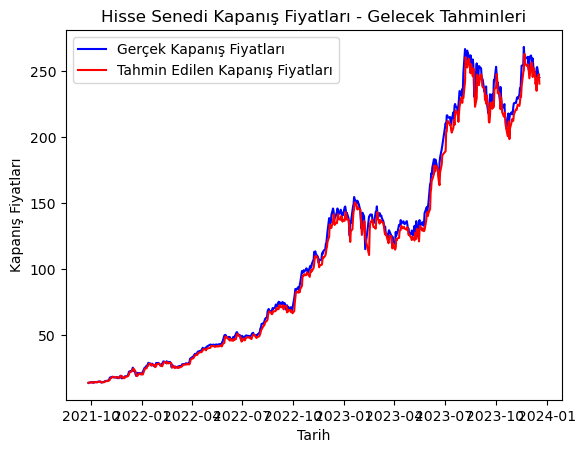

Mean Squared Error: 34.26013911179864


In [43]:
recent_data = df_scaled[-n_steps:].reshape(1, n_steps, 1)
# Gelecekteki fiyatları tahmin etme
future_steps = 5  # Örnek: 5 gün sonrası için tahmin yapma
future_predictions = []

for i in range(len(test) - n_steps):
    x_input = test[i:i + n_steps, 0]
    x_input = x_input.reshape((1, n_steps, 1))
    y_pred = model.predict(x_input, verbose=0)
    future_predictions.append(y_pred[0, 0])

# Tahminleri ters dönüştürme
y_pred_inv = scaler.inverse_transform(np.reshape(future_predictions, (len(future_predictions), 1)))
y_test_inv = scaler.inverse_transform(np.reshape(y_test, (len(y_test), 1)))
future_predictions_series = pd.Series(np.ravel(y_pred_inv), index=df.index[-len(y_test_inv):])


# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.plot(df.index[-len(y_test_inv):], y_test_inv, label='Gerçek Kapanış Fiyatları', color='blue')
plt.plot(df.index[-len(y_test_inv):], y_pred_inv, label='Tahmin Edilen Kapanış Fiyatları', color='red')
plt.title('Hisse Senedi Kapanış Fiyatları - Gelecek Tahminleri')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatları')
plt.legend()
plt.show()

# Hata hesaplama ve görselleştirme
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

In [45]:
# Gelecekteki fiyatları tahmin etme
future_steps = 30  # Örnek: 30 gün sonrası için tahmin yapma
future_predictions = []

# Başlangıç verisini al
x_input = recent_data

for i in range(future_steps):
    # Tahmin yap
    y_pred = model.predict(x_input, verbose=0)
    
    # Tahmin sonucunu listeye ekle
    future_predictions.append(y_pred[0, 0])
    
    # Tahmin sonucunu yeni giriş verisi olarak kullan
    x_input = np.append(x_input[:, 1:, :], [[[y_pred[0, 0]]]], axis=1)

# Tahminleri ters dönüştürme
future_predictions_inv = scaler.inverse_transform(np.reshape(future_predictions, (len(future_predictions), 1)))

# Gelecekteki fiyatları liste olarak gösterme
future_dates = pd.date_range(df.index[-1], periods=future_steps + 1, freq='B')[1:]  # İlk tarih zaten var, onu çıkartıyoruz
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': np.ravel(future_predictions_inv)})

print(future_df)


         Date  Predicted Price
0  2023-12-20       238.972748
1  2023-12-21       232.806229
2  2023-12-22       226.166107
3  2023-12-25       219.247467
4  2023-12-26       212.182785
5  2023-12-27       205.059555
6  2023-12-28       197.938431
7  2023-12-29       190.861740
8  2024-01-01       183.860687
9  2024-01-02       176.959610
10 2024-01-03       170.178162
11 2024-01-04       163.532654
12 2024-01-05       157.036972
13 2024-01-08       150.703186
14 2024-01-09       144.541443
15 2024-01-10       138.560410
16 2024-01-11       132.767212
17 2024-01-12       127.167549
18 2024-01-15       121.765709
19 2024-01-16       116.564705
20 2024-01-17       111.566246
21 2024-01-18       106.770935
22 2024-01-19       102.178223
23 2024-01-22        97.786659
24 2024-01-23        93.593887
25 2024-01-24        89.596786
26 2024-01-25        85.791534
27 2024-01-26        82.173683
28 2024-01-29        78.735924
29 2024-01-30        75.461700


In [41]:
from sklearn.metrics import mean_absolute_error

# Gerçek ve tahmin edilen değerleri kullanarak MAE hesapla
mae = mean_absolute_error(y_test_inv, y_pred_inv)

# Sonucu ekrana yazdır
print(f'Ortalama Mutlak Hata (MAE): {mae}')

Ortalama Mutlak Hata (MAE): 15.58176223191199


In [21]:
future_predictions_series

Date
2021-08-13     12.663068
2021-08-16     12.622686
2021-08-17     12.661734
2021-08-18     12.636124
2021-08-19     12.537139
                 ...    
2023-12-13    197.919037
2023-12-14    194.573441
2023-12-15    195.463257
2023-12-18    196.242661
2023-12-19    194.723251
Length: 592, dtype: float32

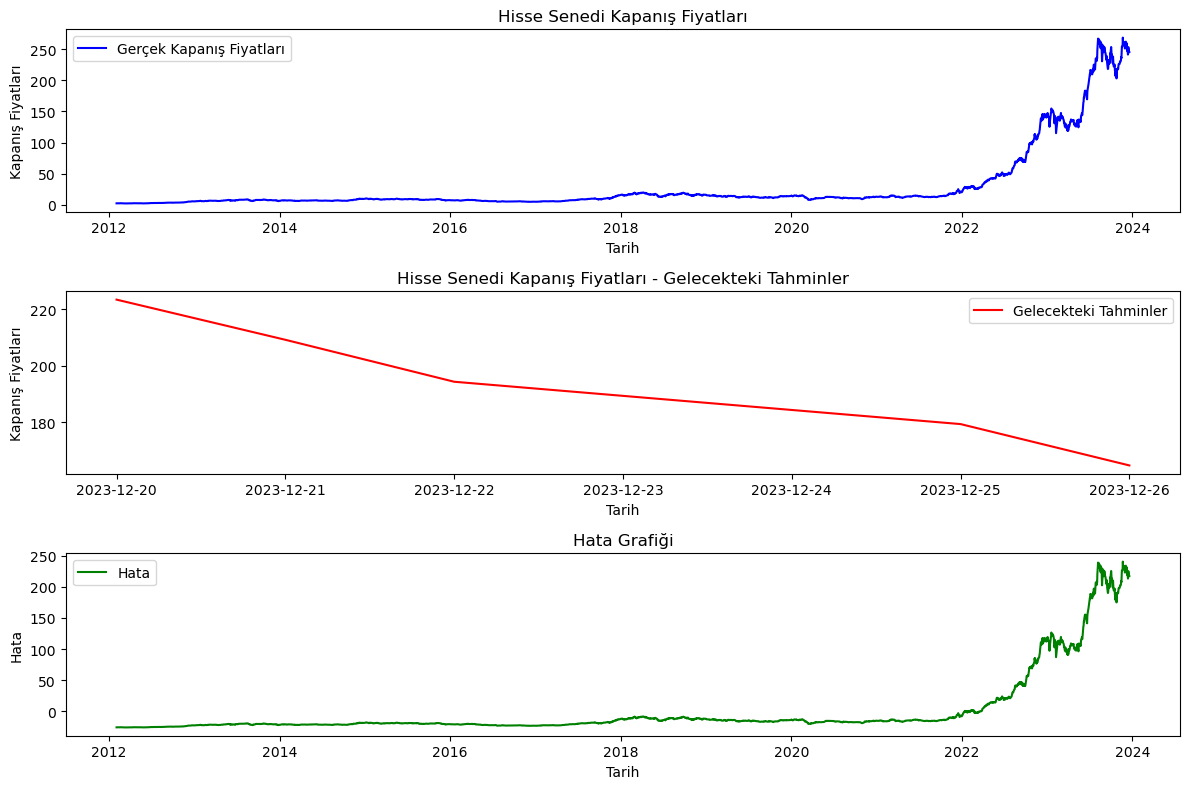

In [28]:
recent_data = df_scaled[-n_steps:].reshape(1, n_steps, 1)

# Gelecekteki veriyi tahmin etme
future_steps = 5  # Örnek: 5 günlük gelecekteki veriyi tahmin etme
future_predictions = []

for i in range(future_steps):
    future_pred = model.predict(recent_data, verbose=0)
    future_predictions.append(future_pred[0, 0])

    # Elde edilen tahmin değerini kullanarak veriyi güncelleme
    recent_data = np.roll(recent_data, -1)
    recent_data[0, -1, 0] = future_pred[0, 0]

# Tahminleri ters dönüştürme
future_predictions_inv = scaler.inverse_transform(np.reshape(future_predictions, (len(future_predictions), 1)))

# Gelecekteki veri tahminlerini görselleştirme
dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]
future_predictions_series = pd.Series(np.ravel(future_predictions_inv), index=dates)

# Mevcut veri ve gelecekteki tahminleri bir araya getirme
combined_data = pd.concat([df, future_predictions_series], axis=0)

# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(12, 8))

# Gerçek Kapanış Fiyatları
plt.subplot(3, 1, 1)
plt.plot(combined_data.index[:-future_steps], combined_data['Close'][:-future_steps], label='Gerçek Kapanış Fiyatları', color='blue')
plt.title('Hisse Senedi Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatları')
plt.legend()

# Gelecekteki Tahminler
plt.subplot(3, 1, 2)
plt.plot(combined_data.index[-future_steps:], future_predictions_series, label='Gelecekteki Tahminler', color='red')
plt.title('Hisse Senedi Kapanış Fiyatları - Gelecekteki Tahminler')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatları')
plt.legend()

# Hata Grafiği
plt.subplot(3, 1, 3)
error = combined_data['Close'][:-future_steps] - combined_data['Close'][:-future_steps].mean()
plt.plot(combined_data.index[:-future_steps], error, label='Hata', color='green')
plt.title('Hata Grafiği')
plt.xlabel('Tarih')
plt.ylabel('Hata')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 629.315886899977


In [31]:
usd_try_data = yf.download("USDTRY=X", start=start_date, end=end_date)
brent_data = yf.download("BZ=F", start=start_date, end=end_date)
closeThyao = bist30_data["Close"]
closeUsd = usd_try_data["Close"]
closeBrent = brent_data["Close"]
bist30_data["Usd"] = closeUsd
bist30_data["Brent"]= closeBrent
bist30_data.fillna(method= "ffill" ,inplace = True)

bist30_data = bist30_data[["Close","Brent","Usd"]]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [37]:

# Veriyi önceden işleme
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(bist30_data)

# Veriyi eğitim setine alın
train_size = int(len(bist30_data) * 0.80)
train = df_scaled[0:train_size]

# Veriyi LSTM uygun formata dönüştürme
def create_dataset(dataset, n_steps):
    dataX, dataY = [], []
    for i in range(len(dataset)-n_steps):
        a = dataset[i:(i+n_steps), :]  # Burada özellik sayısı 3 olduğu için [:, :] kullanılıyor
        dataX.append(a)
        dataY.append(dataset[i + n_steps, 0])
    return np.array(dataX), np.array(dataY)

n_steps = 10  # Örnek: 10 günlük veriye dayalı tahmin yapma
X_train, y_train = create_dataset(train, n_steps)

# LSTM modeli oluşturma
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, bist30_data.shape[1])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Güncel veriyi alın
recent_data = df_scaled[-n_steps:, :].reshape(1, n_steps, bist30_data.shape[1])

# Gelecekteki veriyi tahmin etme
future_steps = 5  # Örnek: 5 günlük gelecekteki veriyi tahmin etme
future_predictions = []

for i in range(future_steps):
    future_pred = model.predict(recent_data, verbose=0)
    future_predictions.append(future_pred[0, 0])

    # Elde edilen tahmin değerini kullanarak veriyi güncelleme
    recent_data = np.roll(recent_data, -1)
    recent_data[0, -1, 0] = future_pred[0, 0]

# Tahminleri ters dönüştürme
future_predictions_inv = scaler.inverse_transform(np.reshape(future_predictions, (len(future_predictions), 1)))


# Gelecekteki veri tahminlerini görselleştirme
dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]
future_predictions_series = pd.Series(np.ravel(future_predictions_inv), index=dates)

# Mevcut veri ve gelecekteki tahminleri bir araya getirme
combined_data = pd.concat([bist30_data, future_predictions_series], axis=0)

# Gerçek ve tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(12, 8))

# Gerçek Kapanış Fiyatları
plt.subplot(3, 1, 1)
plt.plot(combined_data.index[:-future_steps], combined_data['Close'][:-future_steps], label='Gerçek Kapanış Fiyatları', color='blue')
plt.title('Hisse Senedi Kapanış Fiyatları')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatları')
plt.legend()

# Petrol Fiyatı
plt.subplot(3, 1, 2)
plt.plot(combined_data.index[:-future_steps], combined_data['Brent'][:-future_steps], label='Petrol Fiyatı', color='green')
plt.title('Petrol Fiyatı')
plt.xlabel('Tarih')
plt.ylabel('Petrol Fiyatı')
plt.legend()

# Dolar Kuru
plt.subplot(3, 1, 3)
plt.plot(combined_data.index[:-future_steps], combined_data['Usd'][:-future_steps], label='Dolar Kuru', color='orange')
plt.title('Dolar Kuru')
plt.xlabel('Tarih')
plt.ylabel('Dolar Kuru')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/50
77/77 [==============================] - 1s 2ms/step - loss: 1.1659e-04
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 2.3032e-05
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 8.9015e-06
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 4.8316e-06
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 4.0364e-06
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 4.1497e-06
Epoch 7/50
77/77 [==============================] - 0s 2ms/step - loss: 3.4681e-06
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 3.2605e-06
Epoch 9/50
77/77 [==============================] - 0s 2ms/step - loss: 3.5250e-06
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 3.3743e-06
Epoch 11/50
77/77 [==============================] - 0s 2ms/step - loss: 3.9745e-06
Epoch 12/50
77/77 [==============================] - 0s 2ms/step - loss: 3.0734e-06
E

ValueError: non-broadcastable output operand with shape (5,1) doesn't match the broadcast shape (5,3)